1.Carga y preprocesa la imagen (escala de grises y ecualización del histograma)

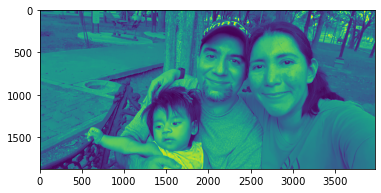

In [1]:
import cv2
import matplotlib.pyplot as plot

imageoriginal = cv2.imread('familia.jpg')
imagegray = cv2.cvtColor(imageoriginal, cv2.COLOR_BGR2GRAY)
plot.imshow(imagegray)

In [2]:
eh = cv2.equalizeHist(imagegray)

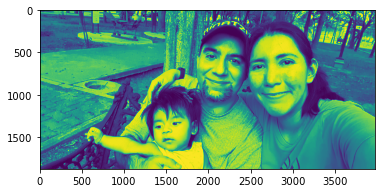

In [3]:
plot.imshow(eh)

2.	Descarga el clasificador de rostros previamente entrenado Haar Cascade de OpenCV. El archivo XML del clasificador es haarcascade_frontalface_default.xml 

In [4]:
FC = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

3.	Identifica los rostros en la imagen, utilizando el clasificador e imprime un recuadro alrededor de cada uno.

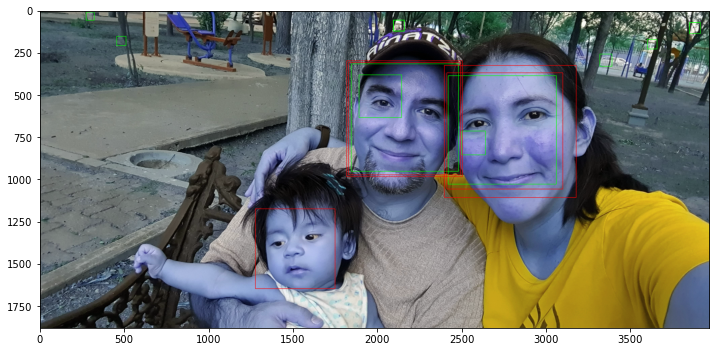

In [11]:
caras = FC.detectMultiScale(imagegray,\
                            scaleFactor=1.1,\
                            minNeighbors=5,\
                            minSize=(80,80),\
                            maxSize=(900,900))

#se almacenarán los puntos x, y, ancho y alto del rostro que ha sido detectado 
for (x,y,w,h) in caras:
    cv2.rectangle(imageoriginal,(x,y),(x+w,y+h),(255,0,0),2)

plot.figure(figsize=(12,12))
plot.imshow(imageoriginal)

4.	Aplica un filtro gaussiano a cada rostro identificado que permita ocultar la identidad de las personas mostradas en la imagen. 

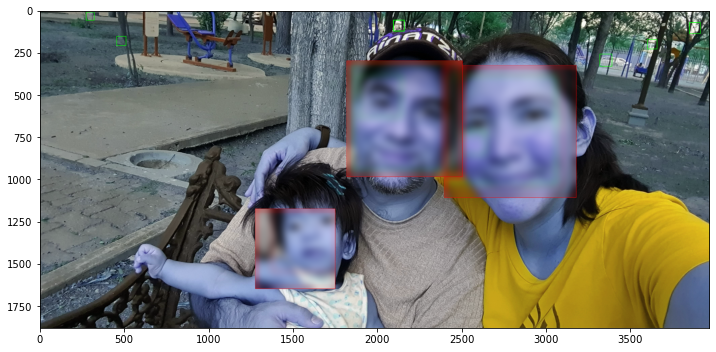

In [22]:
caras = FC.detectMultiScale(imagegray,\
                            scaleFactor=1.1,\
                            minNeighbors=5,\
                            minSize=(80,80),\
                            maxSize=(900,900))
#se almacenarán los puntos x, y, ancho y alto del rostro que ha sido detectado 
#se hace filtro gaussiano
for (x,y,w,h) in caras:
    cv2.rectangle(imageoriginal,(x,y),(x+w,y+h),(255,0,0),2)
    # recortar la cara
    recorte = imageoriginal[y:y + h, x:x + w] 
    # aplicar filtro sobre el recorte
    recorte = cv2.GaussianBlur(recorte, (51, 51), 50)
    # hacer la mezcla de las caras con filtro y la imagen final
    imageoriginal[y:y + recorte.shape[0], x:x + recorte.shape[1]] = recorte
   
plot.figure(figsize=(12,12))
plot.imshow(imageoriginal)
